In [4]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# To split train and test sets
from sklearn.model_selection import train_test_split

# To perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV, cross_val_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, accuracy_score

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Plotting
from xgboost import plot_importance  # To plot feature importance
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# To save the final model on disk
import joblib


In [5]:
# read the dataset
df = pd.read_csv('liver.csv')

In [6]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [7]:
df.shape

(583, 11)

# Exploratory Data Analysis

In [10]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


It seems there is outlier in Aspartate_Aminotransferase as the max value is very high than mean value

In [11]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


#Filtering categorical data

In [13]:
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

# Distribution of numerical Features

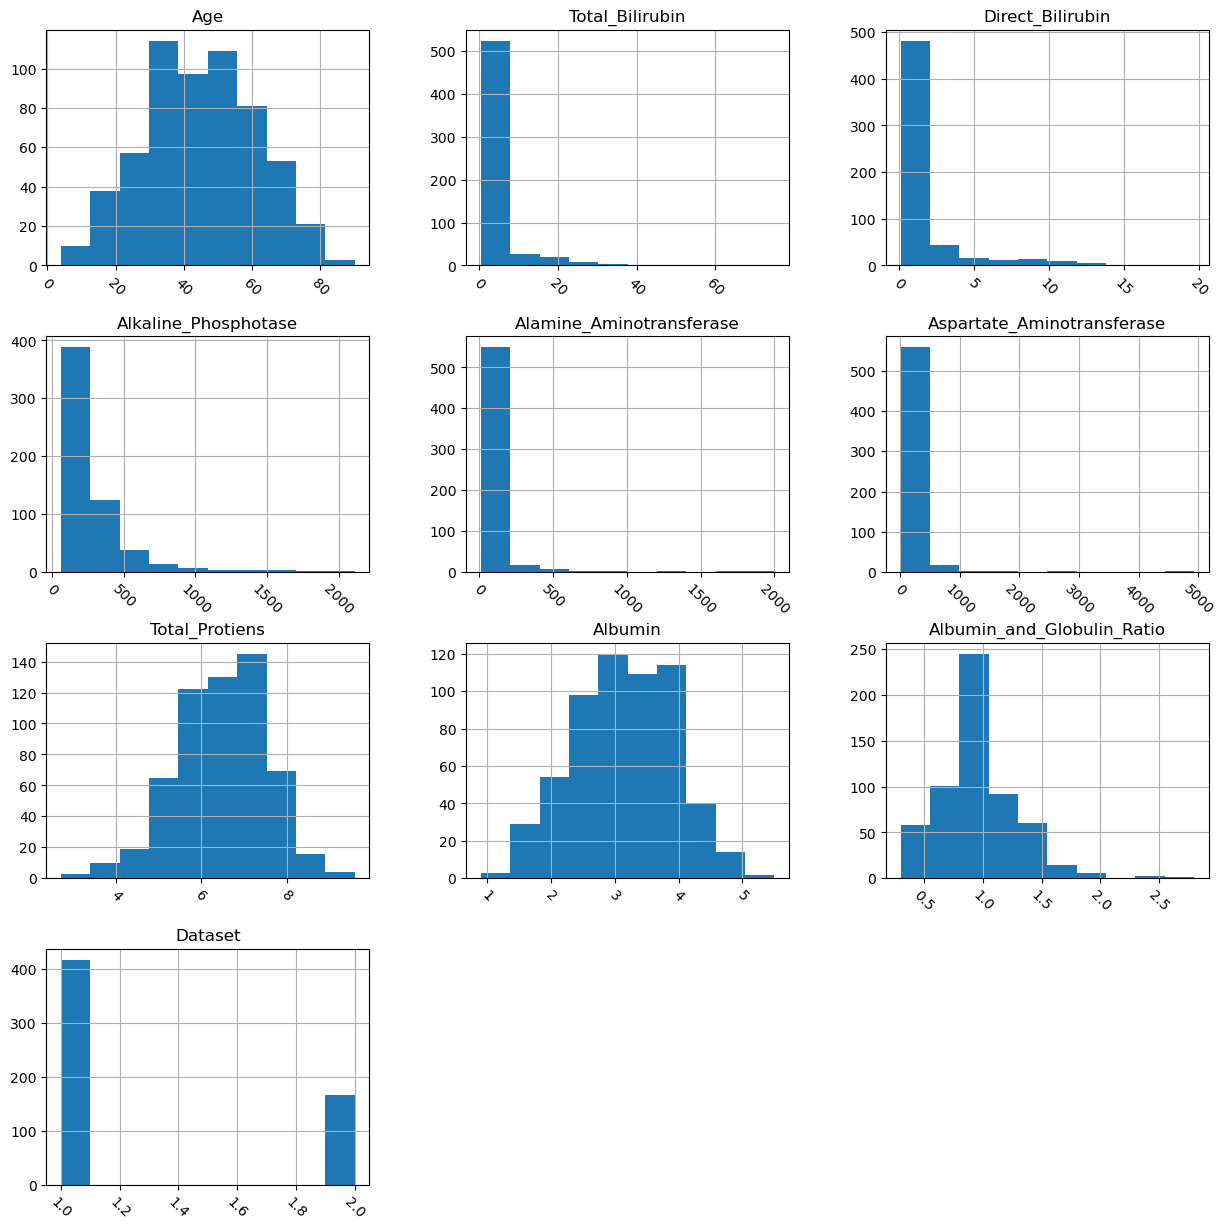

In [14]:
df.hist(figsize=(15,15),xrot = -45, bins=10)
plt.show()

Dataset i.e output value has '1' for liver disease and '2' for no liver disease so let's make it 0 for no disease to make it convenient

In [15]:
#converting values in a Dataset column
def convertdataset(x):
    if x == 2:
        return 0
    return 1

# Apply function to 'Dataset' column
df['Dataset'] = df['Dataset'].map(convertdataset)

In [16]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [18]:
df.Dataset.value_counts()
## '1' --> liver disease
##'0' --> no liver disease

1    416
0    167
Name: Dataset, dtype: int64

# Distribution of categorical data

In [20]:
df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


<Axes: xlabel='count', ylabel='Gender'>

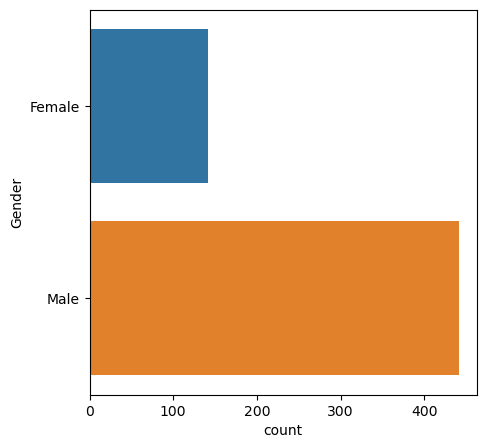

In [21]:
#Bar plots for categorical features
plt.figure(figsize=(5,5))
sns.countplot(y='Gender',data = df)

In [22]:
df[df['Gender'] =='Male'][['Dataset','Gender']].head()

,Dataset,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male


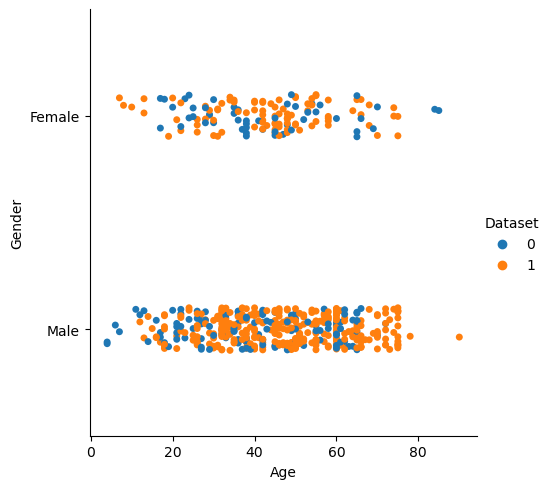

In [23]:
sns.catplot(x="Age", y="Gender", hue="Dataset", data=df, kind="strip")
plt.show()

In [24]:
df['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

Number of patients that are male:  441
Number of patients that are female:  142


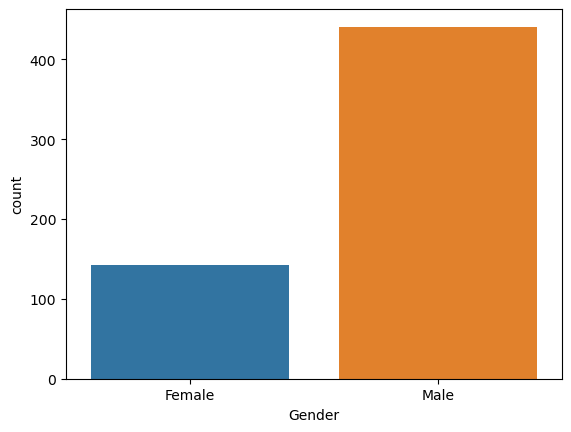

In [25]:
sns.countplot(data=df, x = 'Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

In [26]:
#Categorical value handling
def convertgender(x):
    if x=='Male':
        return 0
    return 1
df['Gender'] = df['Gender'].map(convertgender)

In [27]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Correlations

In [29]:
#Correlation Analysis
df.corr()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


<Axes: >

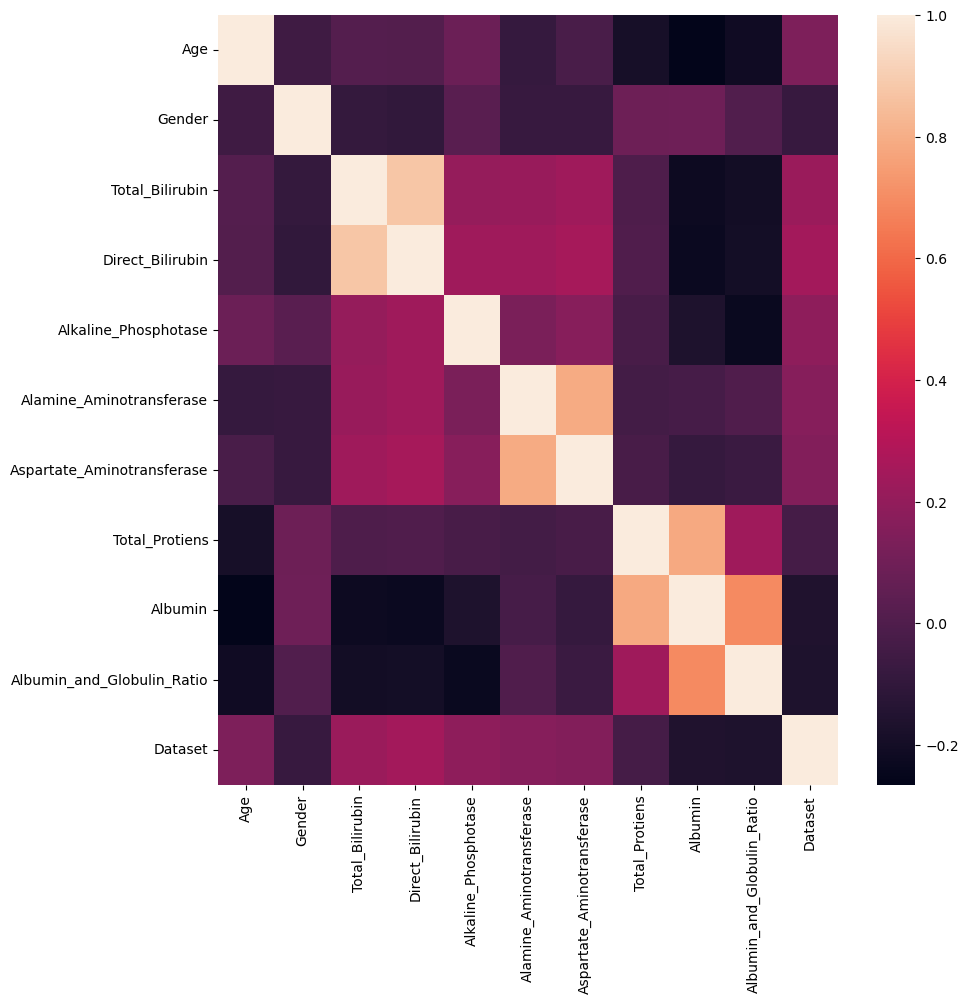

In [30]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr())

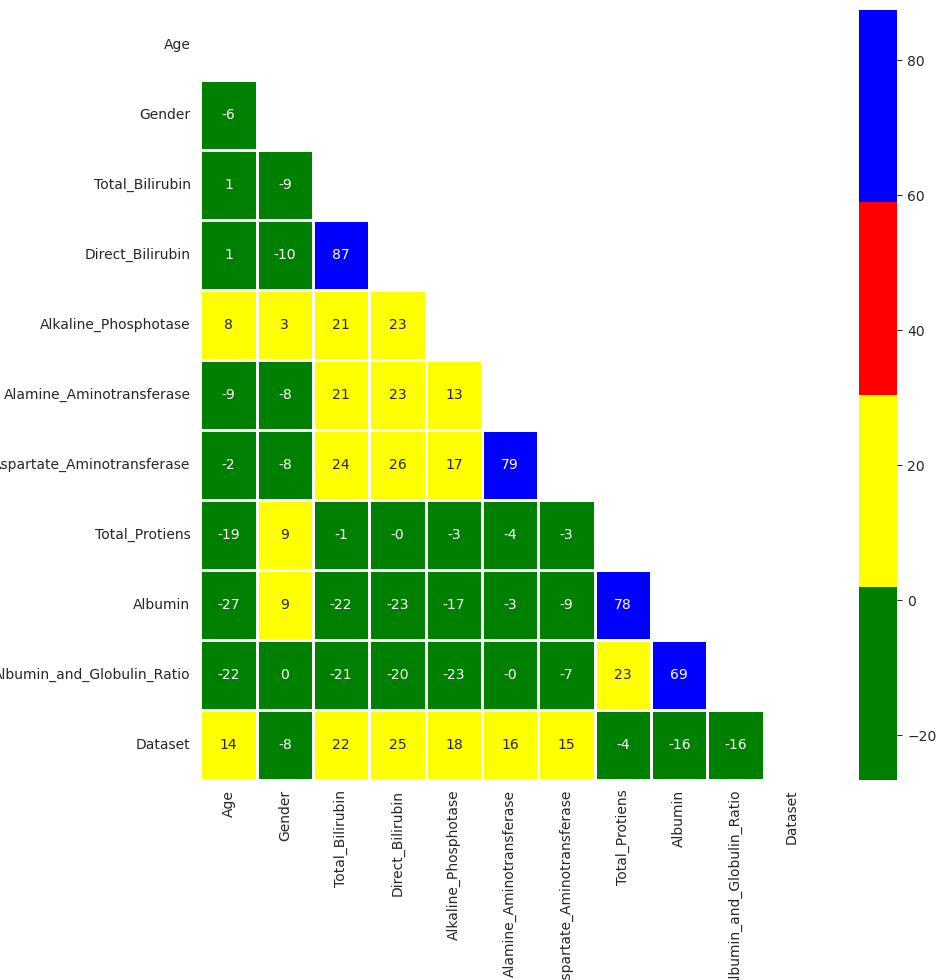

In [31]:
# Creating a mask for the upper triangle
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

# Setting up the figure
plt.figure(figsize=(10,10))

# Plotting the heatmap with a specific style
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt=".0f", annot=True, lw=1, cmap=ListedColormap(['green','yellow','red','blue']))

# Show the plot
plt.show()

# Data Cleaning

In [33]:
df= df.drop_duplicates()
print(df.shape)

(570, 11)


In [34]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

## Removing Outlier

<Axes: >

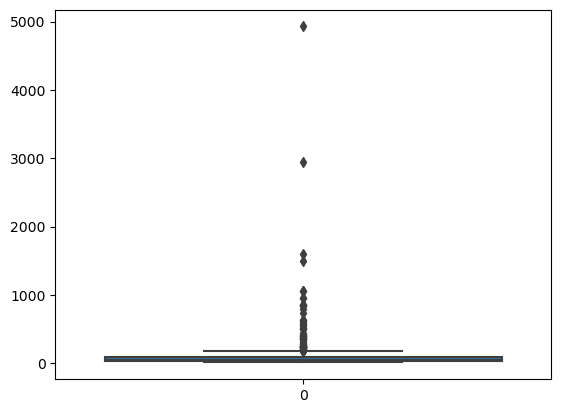

In [35]:

sns.boxplot(df.Aspartate_Aminotransferase)

In [37]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [38]:
df = df[df.Aspartate_Aminotransferase<=3000]


In [39]:
df.shape

(569, 11)

In [40]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [41]:
df = df[df.Aspartate_Aminotransferase<=2500]

<Axes: >

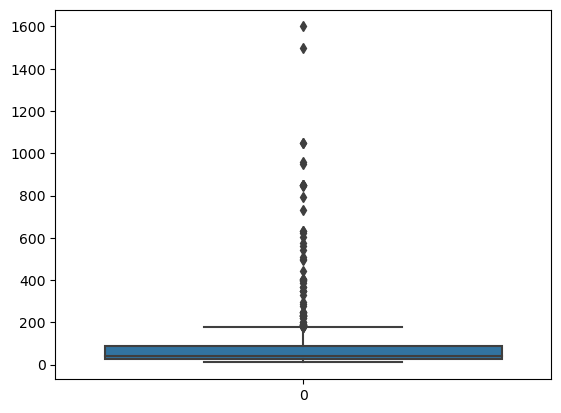

In [42]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [43]:
df.shape

(568, 11)

In [45]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [46]:
df = df.dropna(how='any')

In [47]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [48]:
df.shape

(564, 11)

# Machine Learning Models

In [49]:
# Create separate object for target variable
y = df.Dataset

# Create separate object for input features
X=df.drop('Dataset',axis=1)

In [50]:
#Split X and y into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 42, stratify=y)

In [51]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(451, 10) (113, 10) (451,) (113,)


# Normalization

In [52]:
# Normalization using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled are normalized versions of your data


In [53]:
X_train_scaled

array([[ 0.31608396, -0.57137605,  0.53073383, ..., -0.74026915,
        -1.0856464 , -0.88440069],
       [ 0.93160152, -0.57137605, -0.11954764, ..., -1.20720815,
        -1.5950108 , -1.41097521],
       [ 0.2545322 , -0.57137605, -0.19605134, ..., -0.74026915,
        -0.19425871,  0.44752309],
       ...,
       [ 0.06987694, -0.57137605,  2.94060046, ...,  0.94071126,
         0.18776459, -0.79147577],
       [ 1.30091205, -0.57137605, -0.44468837, ..., -0.17994235,
         0.69712899,  1.37677224],
       [ 0.19298045, -0.57137605, -0.27255504, ...,  0.75393566,
        -0.9583053 , -1.72072492]])

In [56]:
X_test_scaled

array([[ 0.74694625, -0.57137605, -0.31080689, ..., -0.83365695,
        -0.8309642 , -0.48172606],
       [-0.60719237, -0.57137605, -0.44468837, ...,  0.28699665,
         0.31510569,  0.13777338],
       [-0.60719237,  1.75016087, -0.3873106 , ...,  1.31426246,
         0.18776459, -0.79147577],
       ...,
       [ 1.85487785, -0.57137605, -0.04304393, ..., -3.54190315,
        -2.86842179, -1.41097521],
       [-1.16115817, -0.57137605, -0.19605134, ..., -0.36671795,
        -0.576282  , -0.48172606],
       [-1.16115817, -0.57137605, -0.4638143 , ..., -3.44851535,
        -1.97703409,  1.06702253]])

# Model-Selection 

In [68]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
model_score = cross_val_score(estimator=LogisticRegression(), X=X_train_scaled, y=y_train, cv=5)

# Print the cross-validation scores for each fold
print(model_score)

# Print the mean cross-validation score
print(model_score.mean())


[0.73626374 0.73333333 0.72222222 0.73333333 0.72222222]
0.7294749694749696


In [71]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train_scaled, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.72527473 0.72222222 0.7        0.65555556 0.7       ]
0.7006105006105006


In [72]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=XGBClassifier(),X=X_train_scaled, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.65934066 0.67777778 0.62222222 0.64444444 0.73333333]
0.6674236874236874


In [75]:
# Create param dictionary for LogisticRegression
model_param = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),  # Ensure a sufficient number of iterations
        'param': {
            'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
            'penalty': ['l1', 'l2'],  # Type of regularization
            'solver': ['liblinear', 'lbfgs', 'newton-cg', 'saga']  # Optimization algorithms
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'param': {
            'n_estimators': [10, 50, 100, 130],
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1),
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier': {
        'model': XGBClassifier(objective='binary:logistic'),
        'param': {
            'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}


In [76]:
# List to store results
scores = []

# Perform Grid Search for each model
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(
        estimator=mp['model'], 
        param_grid=mp['param'], 
        cv=5, 
        return_train_score=False
    )
    model_selection.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

# Print the results
for score in scores:
    print(f"Model: {score['model']}")
    print(f"Best Score: {score['best_score']}")
    print(f"Best Params: {score['best_params']}")
    print()

Model: LogisticRegression
Best Score: 0.7252212389380531
Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

Model: RandomForestClassifier
Best Score: 0.7216340075853351
Best Params: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 50}

Model: XGBClassifier
Best Score: 0.714554361567636
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}



# Model Building

In [78]:
#as per above results, logistic Regression gives best result and hence selecting same to model building...

# Define the Logistic Regression model with the best parameters
model_lr = LogisticRegression(C=0.1, penalty='l2', solver='lbfgs', max_iter=1000)

# Fit the model on your training data
model_lr.fit(X_train_scaled, y_train)

# Optionally, evaluate the model on test data
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = model_lr.predict(X_test_scaled)

# Print performance metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7168141592920354
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.06      0.11        32
           1       0.72      0.98      0.83        81

    accuracy                           0.72       113
   macro avg       0.61      0.52      0.47       113
weighted avg       0.66      0.72      0.63       113



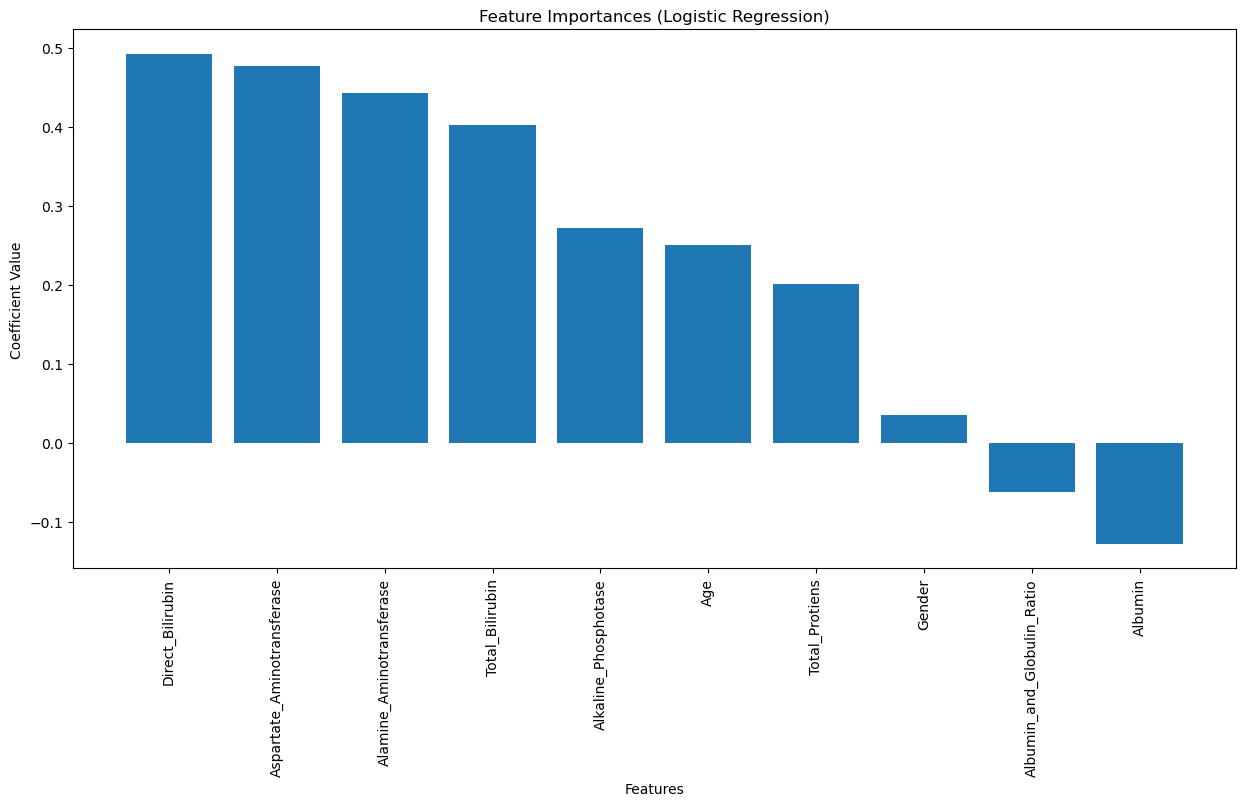

In [80]:
# Get the feature importances (coefficients) from the Logistic Regression model
feature_importances = model_lr.coef_[0]  # For binary classification, coef_ is a 1D array
headers = ["name", "score"]
values = sorted(zip(X_train.columns, feature_importances), key=lambda x: x[1] * -1)

# Create a DataFrame for feature importances
lr_feature_importances = pd.DataFrame(values, columns=headers)

# Plot feature importances
fig = plt.figure(figsize=(15, 7))
x_pos = np.arange(len(lr_feature_importances))
plt.bar(x_pos, lr_feature_importances['score'])
plt.xticks(x_pos, lr_feature_importances['name'], rotation=90)
plt.title('Feature Importances (Logistic Regression)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

In [81]:
#Confusion Matrix
cm = confusion_matrix(y_test,model_lr.predict(X_test_scaled))
cm

array([[ 2, 30],
       [ 2, 79]], dtype=int64)

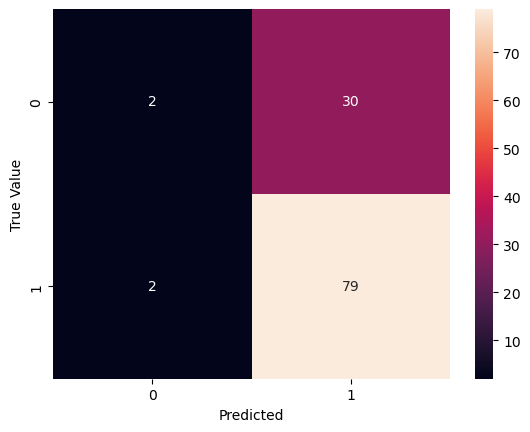

In [82]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()